# Creating and saving a single task dataset from predefined tasks

### Imports

In [1]:
import sys
sys.path.append('../')

In [2]:
from cognitive import constants as const
from cognitive.auto_task.auto_task_util import write_trial_instance
from cognitive.task_bank import CompareLocTemporal, CompareCategoryTemporal, SequentialCategoryMatch
import os
import shutil
import glob
import json

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

### Constant Definitions

- Here we define the constants for the task
    - NOTE: here we will be generating training data. For validation data you must specify a validation stimulus and set train=False. 

In [19]:
output_dir = 'outputs/trials/validation' 
stim_dir = '../data/shapenet_handpicked_val'
n_tasks = 2000 # number of tasks to be generated
const.DATA = const.Data(dir_path=stim_dir, max_memory=3, train=False)


# Create the output directory
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)
os.makedirs(output_dir)

- Generate the tasks and write them to the output directory
- (remember to specify 'train' parameter of write function)

In [20]:
for i in range(n_tasks):
    # Choose a task class (see task_bank or make your own see individual_task_gen.ipynb)
    task = CompareCategoryTemporal(whens=['last2','last0'])

    # Write trial to disk
    fp = os.path.join(output_dir, 'trial' + str(i))
    write_trial_instance(task, fp, 224, True, train=False)

time:  0.010761737823486328
time:  0.0038564205169677734
time:  0.003781557083129883
time:  0.0035216808319091797
time:  0.0036504268646240234
time:  0.003943681716918945
time:  0.0037145614624023438
time:  0.0035860538482666016
time:  0.0039598941802978516
time:  0.0038073062896728516
time:  0.0037088394165039062
time:  0.0037703514099121094
time:  0.004072427749633789
time:  0.003808736801147461
time:  0.003984212875366211
time:  0.00360870361328125
time:  0.0036444664001464844
time:  0.0038776397705078125
time:  0.0037152767181396484
time:  0.0038955211639404297
time:  0.004022359848022461
time:  0.003564596176147461
time:  0.003976345062255859
time:  0.003507375717163086
time:  0.0038928985595703125
time:  0.0036492347717285156
time:  0.0045452117919921875
time:  0.0036516189575195312
time:  0.0038597583770751953
time:  0.003584146499633789
time:  0.0037698745727539062
time:  0.0037186145782470703
time:  0.0034346580505371094
time:  0.004067659378051758
time:  0.0038805007934570312

Regular Pillow Times (10k)
- Average time:  0.00742887408733368
- Max time:  0.10497045516967773
- Min time:  0.006044864654541016

Optimized Pillow Times (10k)
- Average time:  0.00705133376121521
- Max time:  0.17676377296447754
- Min time:  0.005532264709472656

opencv Times (10k)
- Average time:  0.004451341485977173
- Max time:  0.09650158882141113
- Min time:  0.003529071807861328

instruction  observe object 1, delay, observe object 2, category of object 1 equals category of object 2?
answers:  ['null', 'null', 'true']


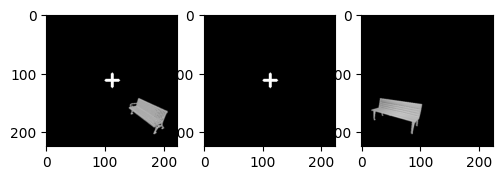

In [7]:
images = []
for img_path in sorted(glob.glob('outputs/trials/train/trial0/*.png')):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,10))
columns = 10
for i, image in enumerate(images):
    plt.subplot(len(images) // columns + 1, columns, i + 1)
    plt.imshow(image)
with open('outputs/trials/train/trial0/trial_info') as f:
    trial_info = json.load(f)
print('instruction ', trial_info['instruction'])
print('answers: ', trial_info['answers'])